In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
data=pd.read_csv('data.csv')

In [123]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [124]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True) #dropping id as it has no significant value for our task

In [125]:
len(data.columns)

31

In [126]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
len(data.columns)

31

In [128]:
data_mean=data.groupby(by='diagnosis').mean(numeric_only=True)
data_median=data.groupby(by='diagnosis').median(numeric_only=True)

In [129]:
data_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [130]:
data_median

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


<Axes: xlabel='diagnosis', ylabel='count'>

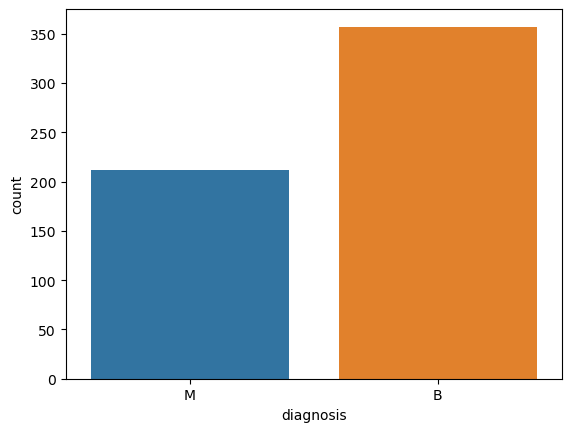

In [131]:
sns.countplot(data=data,x='diagnosis')

C:\Users\adipu\AppData\Local\Temp\ipykernel_6208\2160306111.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


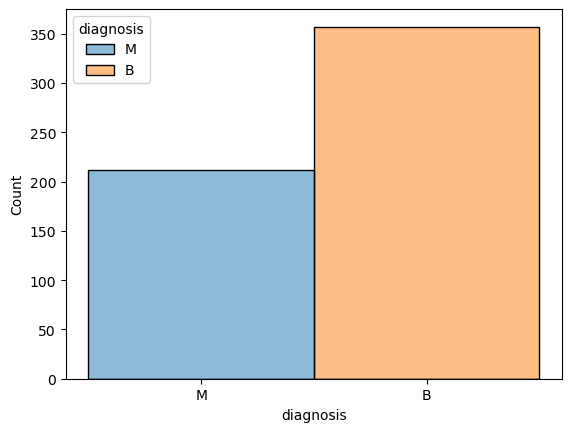

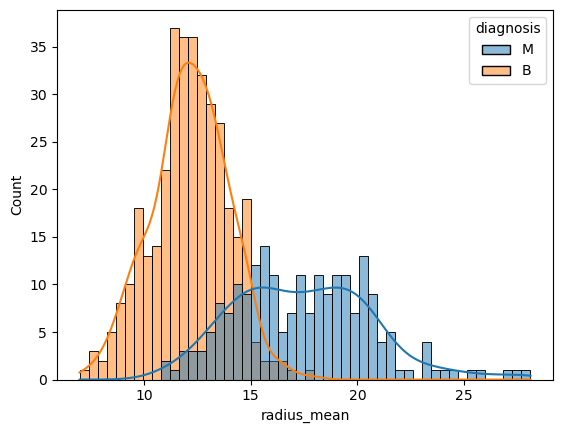

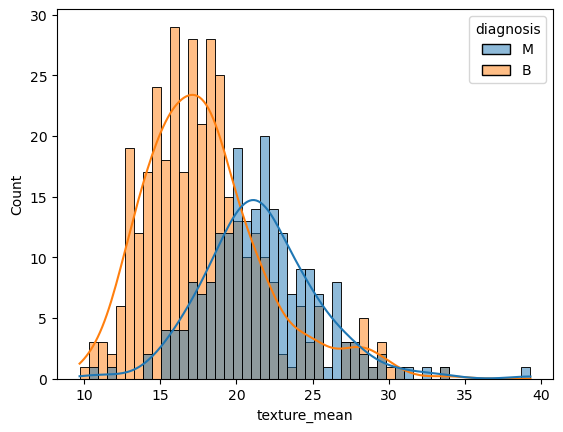

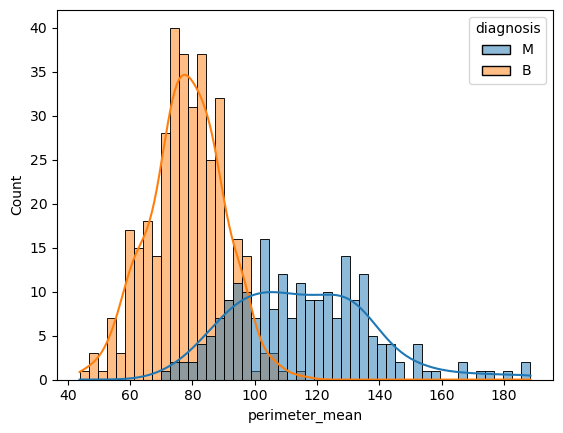

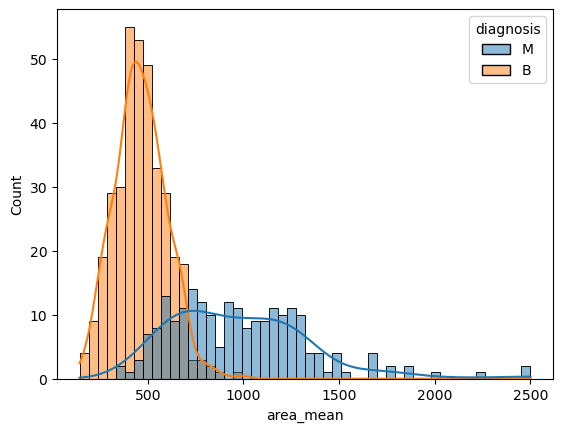

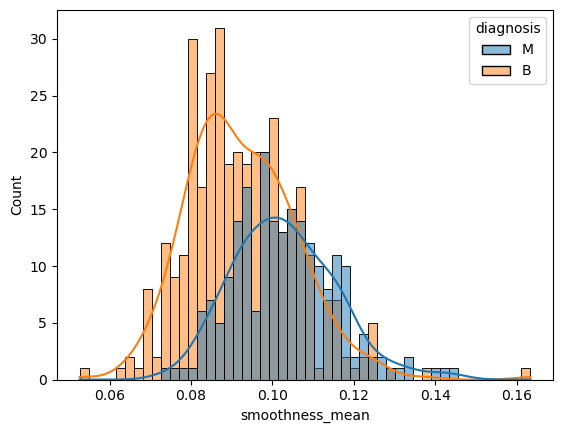

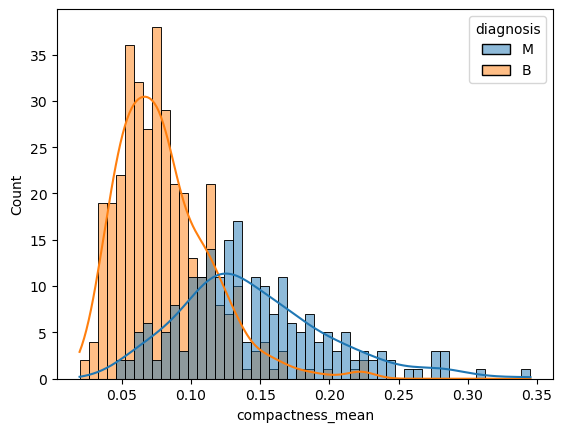

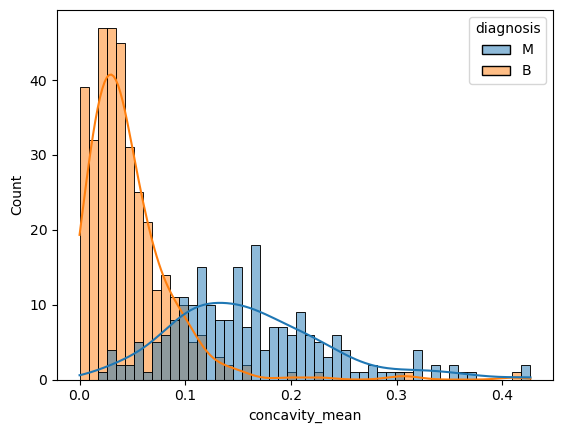

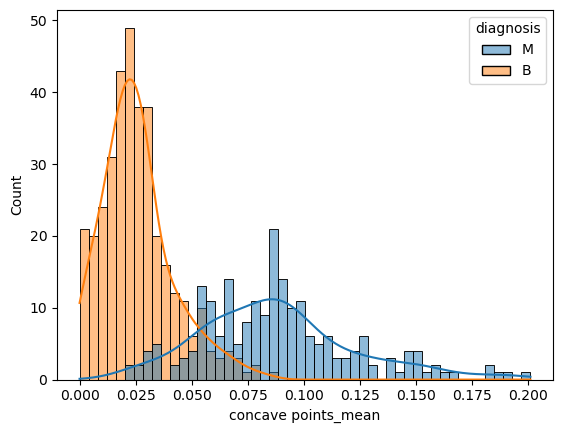

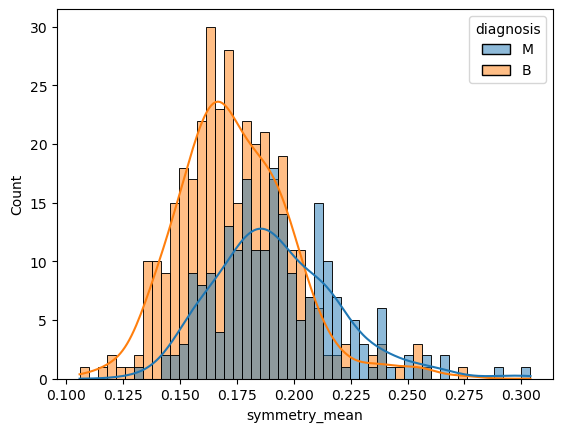

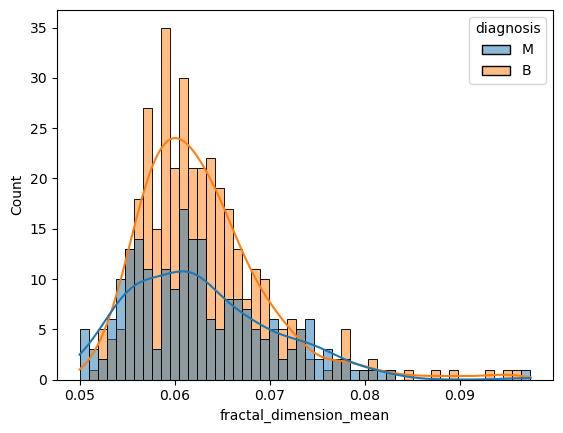

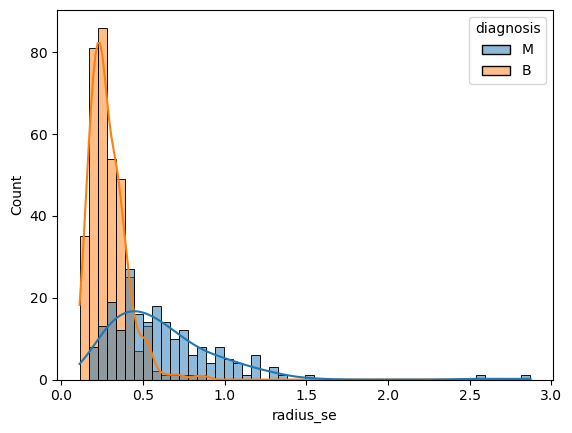

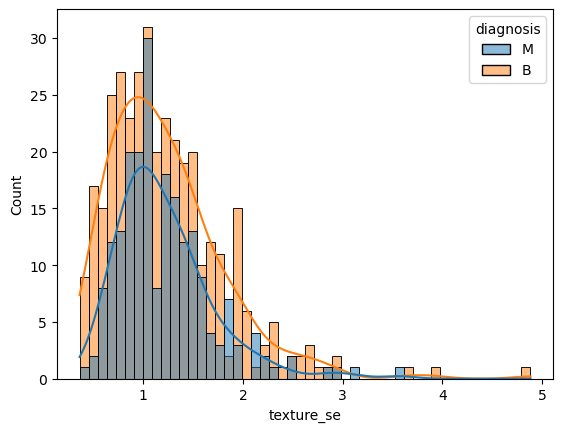

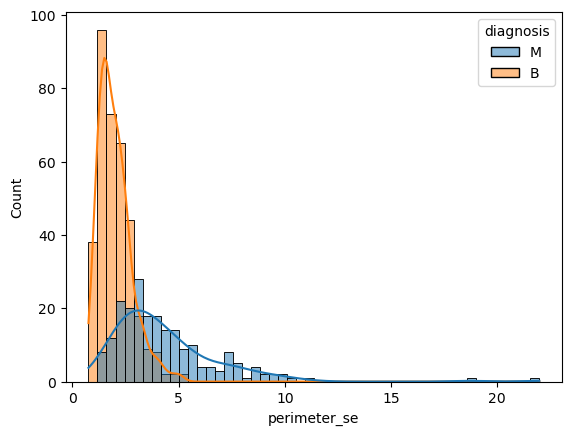

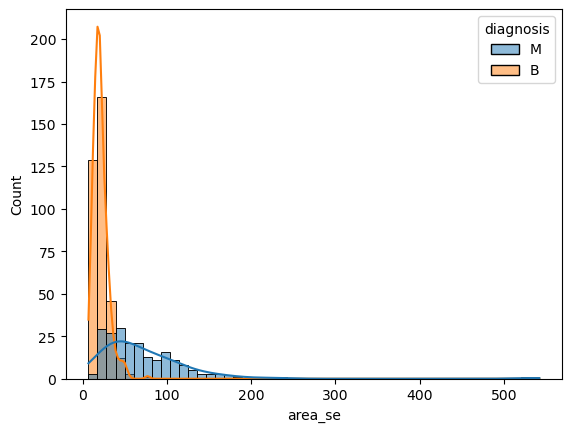

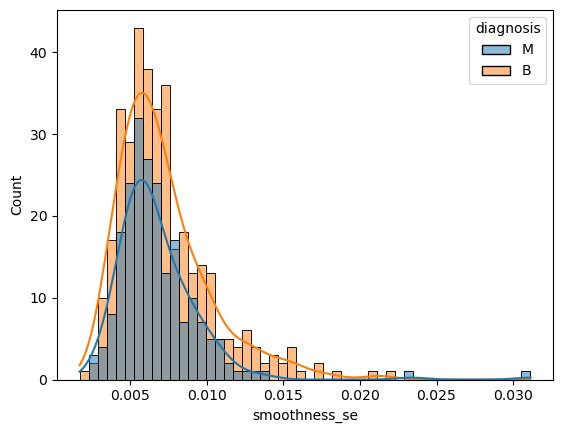

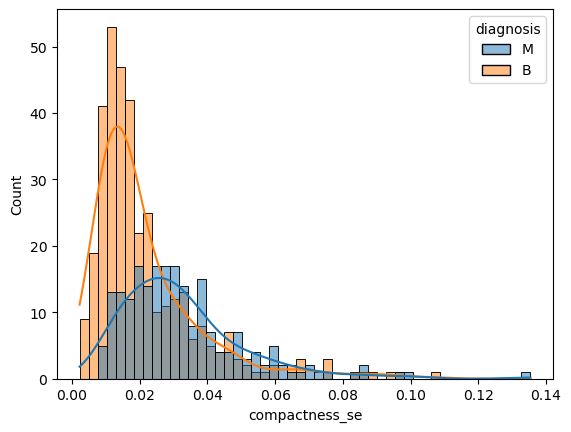

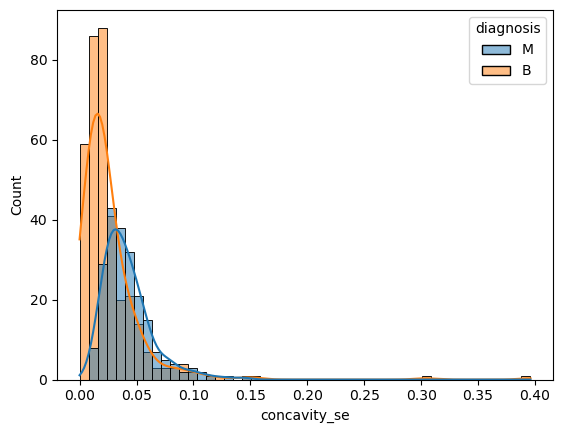

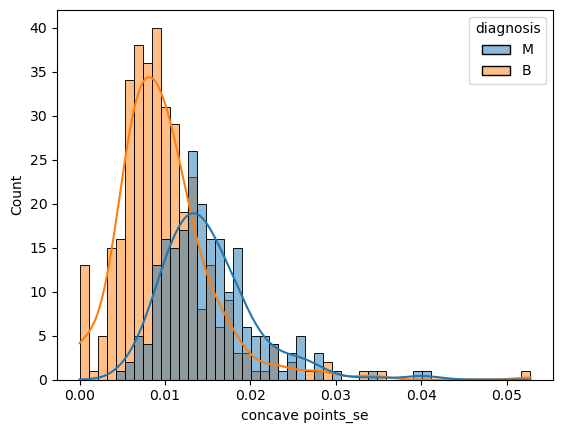

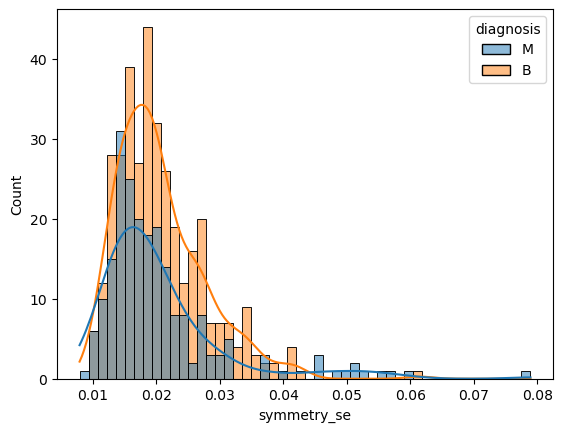

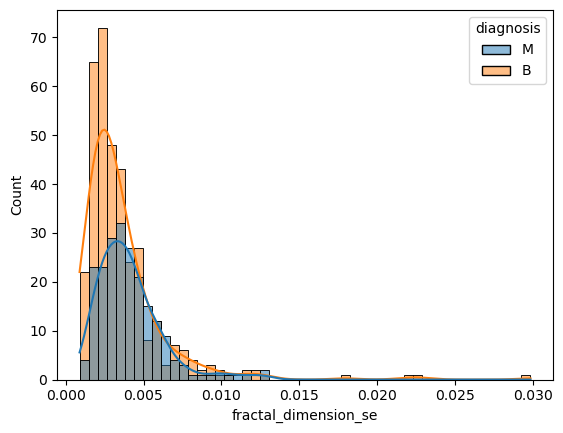

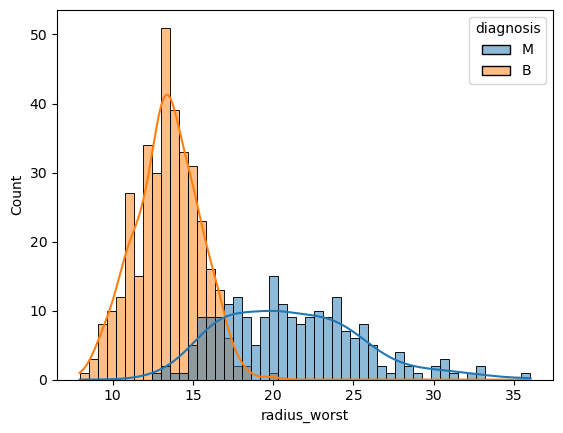

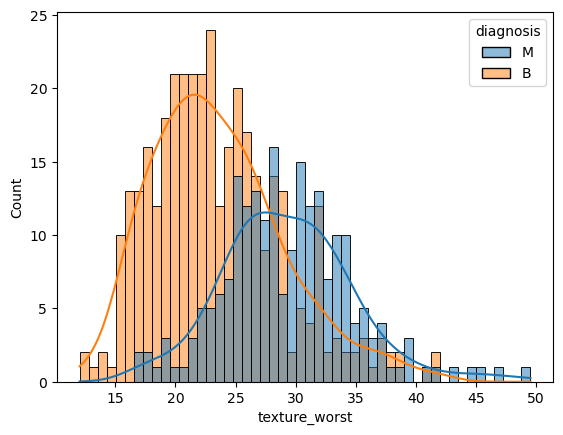

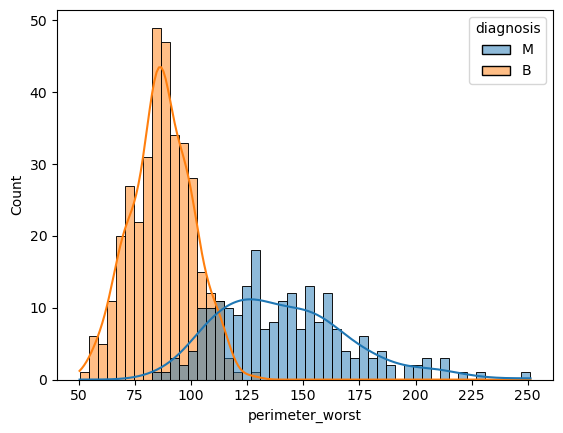

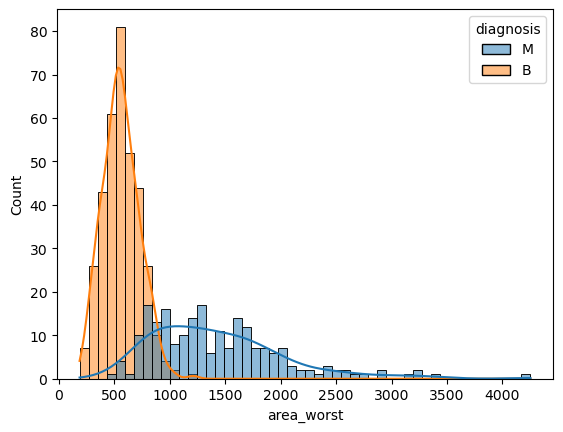

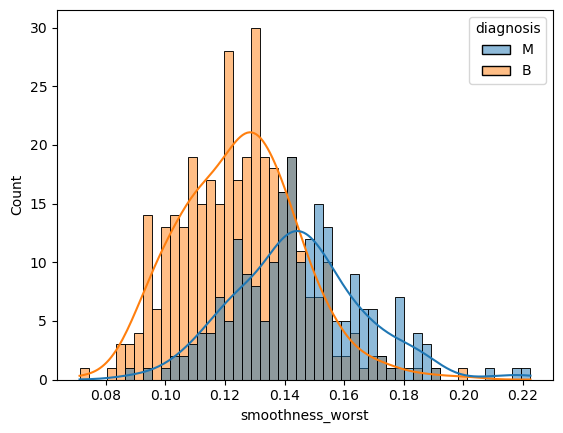

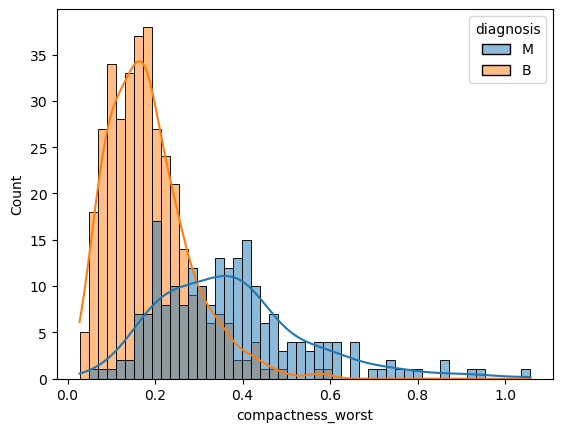

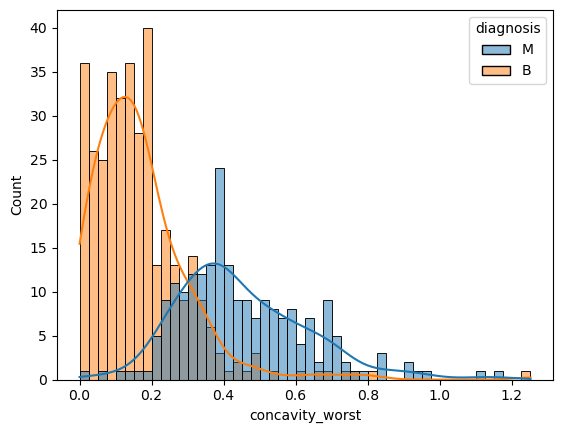

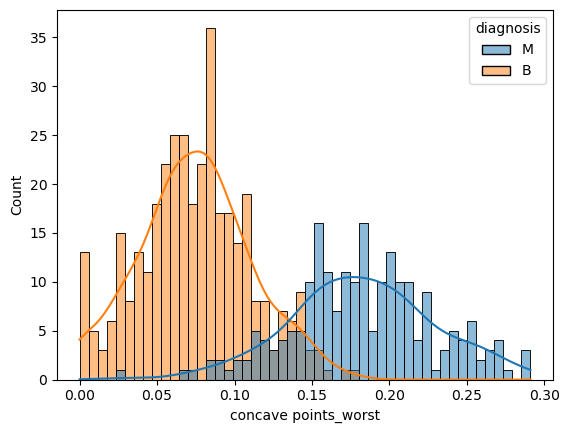

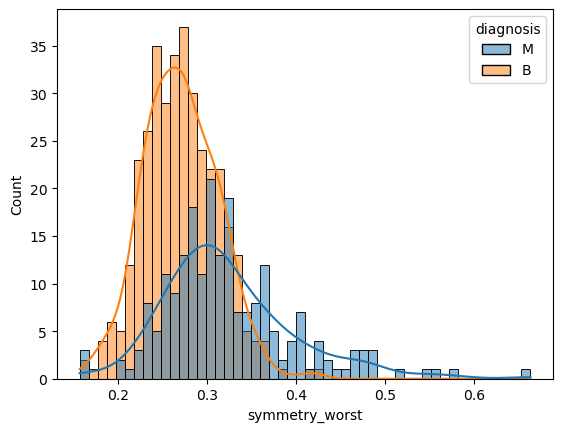

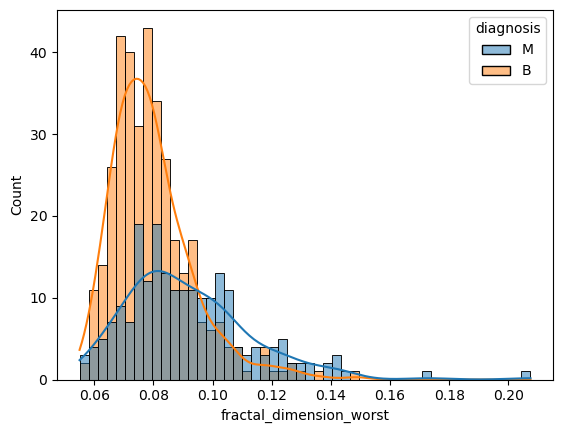

In [37]:
for i in data.columns:
    plt.figure()
    sns.histplot(data=data,x=i,kde=True,bins=50,hue='diagnosis')
    plt.close
#from the given plot separating the diagnosis we can see a clear differentiation between the parameters used in diagnosis


In [320]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']
y=y.map({"M":1,"B":0})

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [322]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [323]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [324]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.94      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [325]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [326]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        89
           1       0.87      0.87      0.87        54

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [327]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [328]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [329]:
model=Sequential()

model.add(Dense(16,activation='relu'))

model.add(Dense(8,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [330]:
es=EarlyStopping(monitor='val_loss',patience=3,mode='min')

In [331]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[es],verbose=1)

Epoch 1/1000
14/14 [==============================] - 1s 9ms/step - loss: 0.7045 - accuracy: 0.5352 - val_loss: 0.6631 - val_accuracy: 0.7483
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.8099 - val_loss: 0.6180 - val_accuracy: 0.8322
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.8568 - val_loss: 0.5649 - val_accuracy: 0.8392
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8779 - val_loss: 0.5269 - val_accuracy: 0.8392
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8991 - val_loss: 0.5069 - val_accuracy: 0.8671
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.9131 - val_loss: 0.4846 - val_accuracy: 0.8741
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.9272 - val_loss: 0.4690 - val_accuracy: 0.9021
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9930 - val_loss: 0.2735 - val_accuracy: 0.9790
Epoch 59/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9930 - val_loss: 0.2709 - val_accuracy: 0.9790
Epoch 60/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9930 - val_loss: 0.2686 - val_accuracy: 0.9790
Epoch 61/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9930 - val_loss: 0.2650 - val_accuracy: 0.9790
Epoch 62/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9930 - val_loss: 0.2630 - val_accuracy: 0.9790
Epoch 63/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9930 - val_loss: 0.2601 - val_accuracy: 0.9790
Epoch 64/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9930 - val_loss: 0.2584 - val_accuracy: 0.9790
Epoch 65/1000

14/14 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9953 - val_loss: 0.1836 - val_accuracy: 0.9860
Epoch 116/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9953 - val_loss: 0.1829 - val_accuracy: 0.9860
Epoch 117/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9953 - val_loss: 0.1823 - val_accuracy: 0.9860
Epoch 118/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9953 - val_loss: 0.1801 - val_accuracy: 0.9790
Epoch 119/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9953 - val_loss: 0.1791 - val_accuracy: 0.9790
Epoch 120/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9953 - val_loss: 0.1778 - val_accuracy: 0.9860
Epoch 121/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9953 - val_loss: 0.1765 - val_accuracy: 0.9860
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9953 - val_loss: 0.1305 - val_accuracy: 0.9790
Epoch 173/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9953 - val_loss: 0.1305 - val_accuracy: 0.9790
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9953 - val_loss: 0.1296 - val_accuracy: 0.9790
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9953 - val_loss: 0.1290 - val_accuracy: 0.9790
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9953 - val_loss: 0.1290 - val_accuracy: 0.9790
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9953 - val_loss: 0.1285 - val_accuracy: 0.9790
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9953 - val_loss: 0.1284 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9953 - val_loss: 0.1017 - val_accuracy: 0.9790
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9953 - val_loss: 0.1002 - val_accuracy: 0.9790
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9953 - val_loss: 0.0997 - val_accuracy: 0.9790
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9953 - val_loss: 0.0993 - val_accuracy: 0.9790
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9953 - val_loss: 0.0995 - val_accuracy: 0.9790
Epoch 234/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9953 - val_loss: 0.1004 - val_accuracy: 0.9790
Epoch 235/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9953 - val_loss: 0.1004 - val_accuracy:

<Axes: >

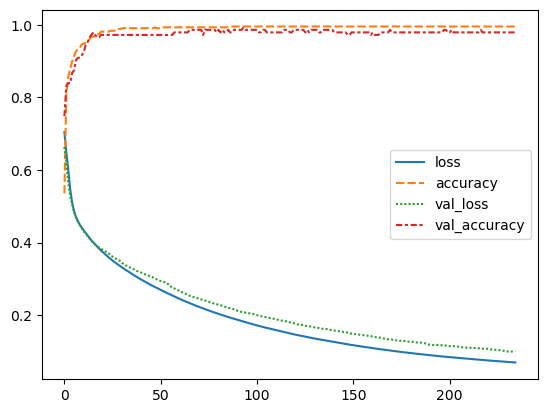

In [332]:
sns.lineplot(model.history.history)

In [333]:
pred=model.predict(X_test)

5/5 [==============================] - 0s 687us/step


In [334]:
pred=(pred>0.5)*1

In [335]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [336]:
model.save('final_model.keras')